Metody statystyczne w bioinformatyce strukturalnej


Ocena 3.0

Przeprowadź analizę statystyczną i wizualną kluczowych metryk strukturalnych:
1. Stwórz histogramy i wykresy pudełkowe dla każdej metryki (RMSD, LDDT, TM_score, GDT_TS,
Clash), prezentując ich rozkłady.
2. Opracuj tabelę zawierającą następujące statystyki dla każdej metryki:

• Wartość minimalna

• Wartość maksymalna

• Mediana

• Średnia arytmetyczna

• Odchylenie standardowe

• Rozstęp międzykwartylowy

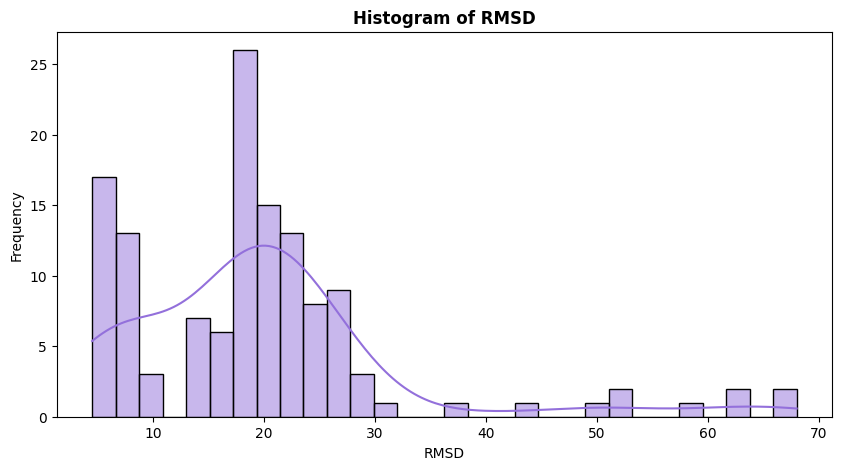

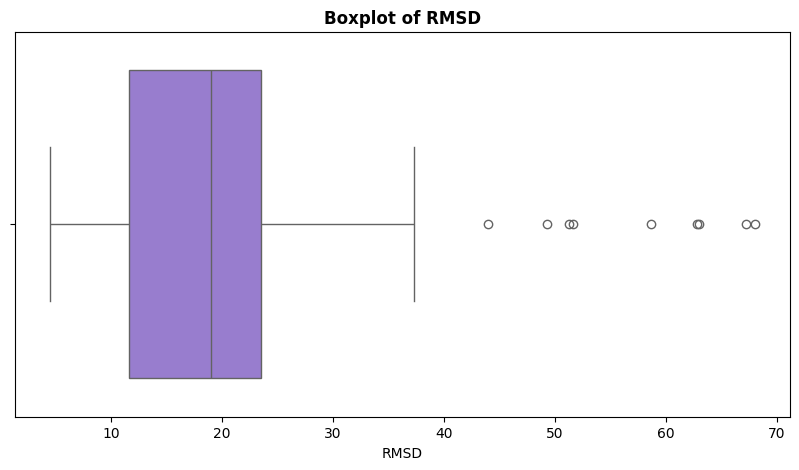

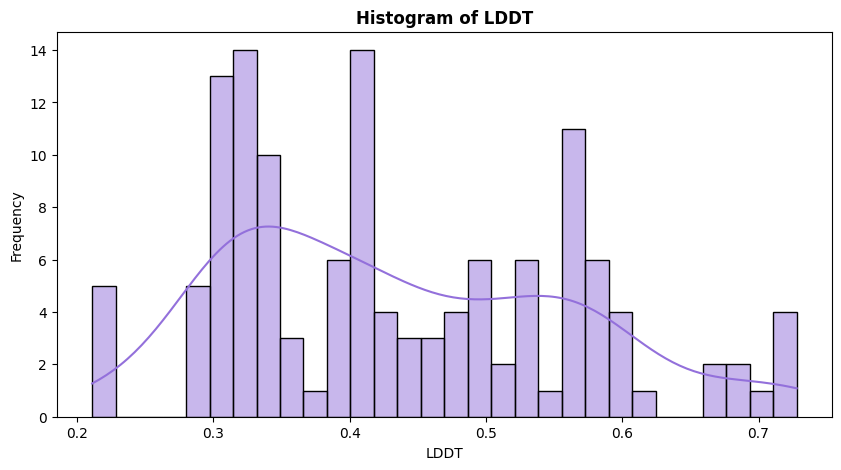

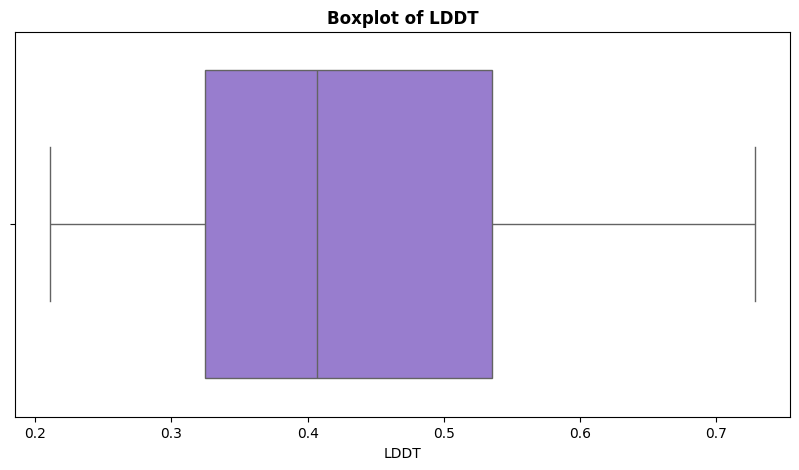

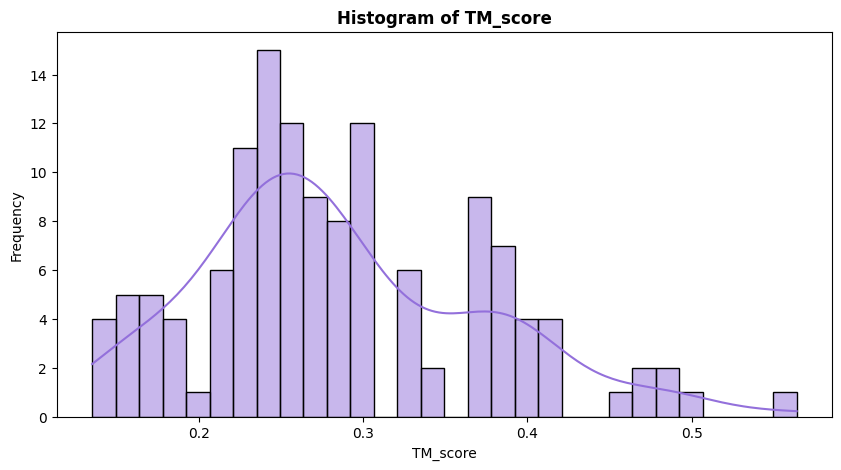

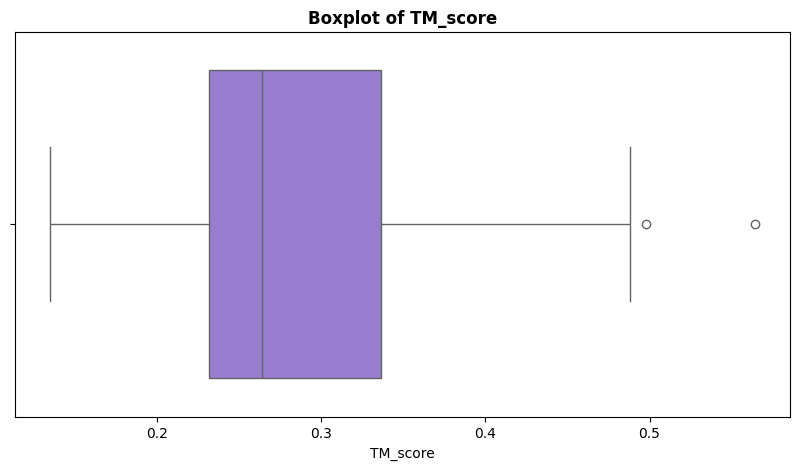

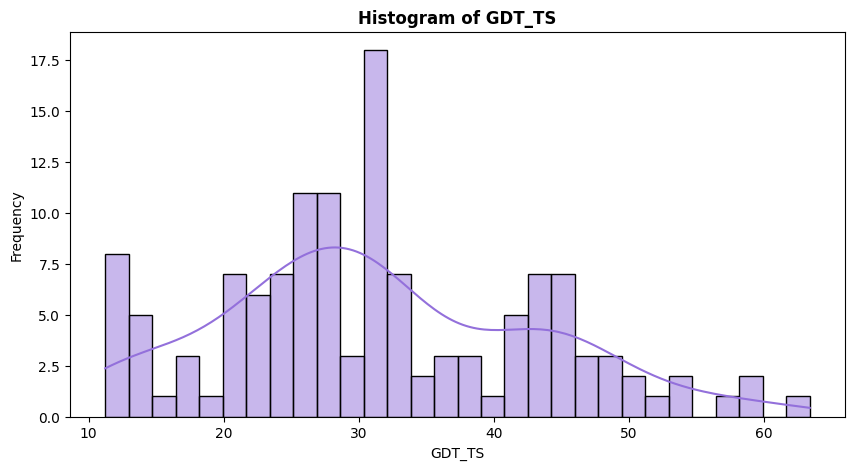

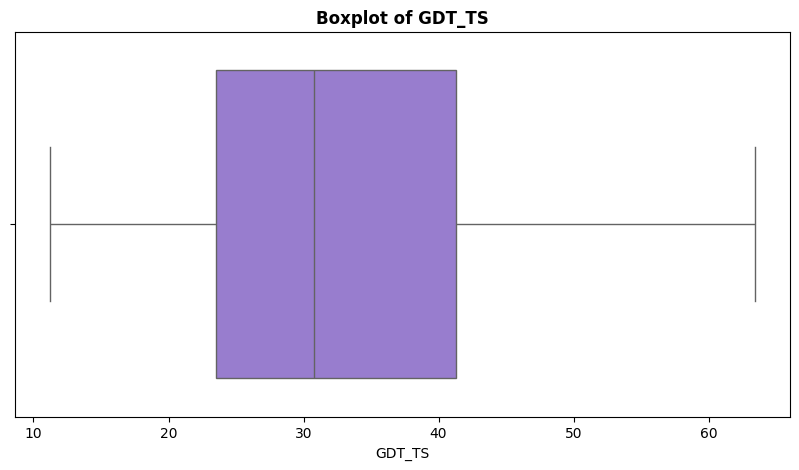

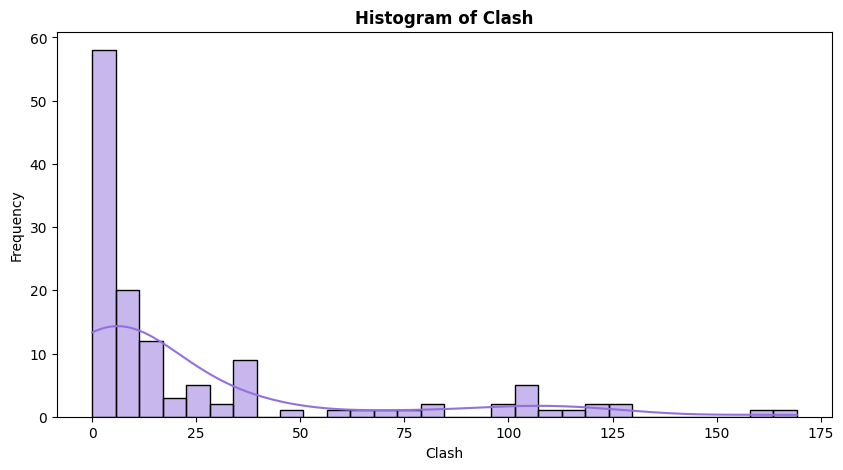

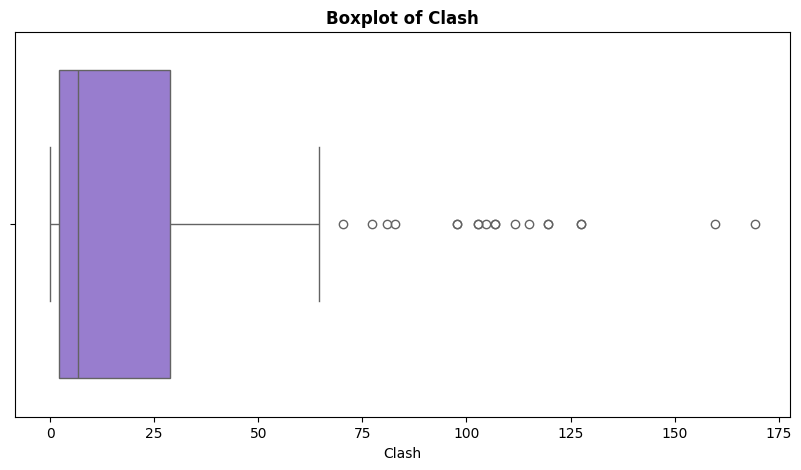

Tabela ze statystykami
             Min      Max  Median       Mean    Std Dev      IQR
RMSD       4.520   67.980  18.980  19.880687  12.564820  11.9050
LDDT       0.211    0.728   0.407   0.435221   0.125473   0.2110
TM_score   0.135    0.564   0.264   0.284901   0.086125   0.1045
GDT_TS    11.230   63.410  30.800  31.372672  11.642187  17.7550
Clash      0.000  169.220   6.780  24.816183  38.219974  26.6650


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn

file= 'R1107.csv'
data = pd.read_csv(file)

metrics = ['RMSD', 'LDDT', 'TM_score', 'GDT_TS', 'Clash']

metrics_data = data[metrics].dropna()

stats = {}

for metric in metrics:
    stats[metric] = {
        'Min': metrics_data[metric].min(),
        'Max': metrics_data[metric].max(),
        'Median': metrics_data[metric].median(),
        'Mean': metrics_data[metric].mean(),
        'Std Dev': metrics_data[metric].std(),
        'IQR': metrics_data[metric].quantile(0.75) - metrics_data[metric].quantile(0.25)
    }
    
    plt.figure(figsize=(10, 5))
    seaborn.histplot(metrics_data[metric], bins=30, kde=True, color='mediumpurple')
    plt.title(f'Histogram of {metric}', fontweight= 'bold')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    seaborn.boxplot(x=metrics_data[metric], color='mediumpurple')
    plt.title(f'Boxplot of {metric}', fontweight= 'bold')
    plt.xlabel(metric)
    plt.show()

stats_df = pd.DataFrame(stats).T

print("Tabela ze statystykami")
print(stats_df)

Ocena 3.5

Sprawdź zależności między parami metryk dla każdego modelu:

1. Stwórz wykresy punktowe dla wszystkich par metryk, umieszczając wartości jednej metryki na osi X, a drugiej na osi Y. Każdy punkt na wykresie będzie reprezentował pojedynczy model.

2. Wybierz, który test wykonać by sprawdzić niezależność zmiennych: chi-kwadrat (χ2) lub Spearmana. Uzasadnij swój wybór i wykonaj test dla każdej pary metryk


**Wybrano test Spearmana, gdyż jest on odpowiednim testem dla danych ciągłych ilościowych oraz, gdy zależy nam na zbadaniu zależności między zmiennymi - kierunku/siły, test jest odporny na outliery, co sprawia, że jest dobrze dopasowany dla prezentowanego zestawu danych. Jeśli chcielibyśmy użyć testu chi-kwadrat to musielibyśmy podzielić dane na przedziały, tracimy wtedy dokładność, co mija się z celem w przypadku takich metryk jak RMSD.**

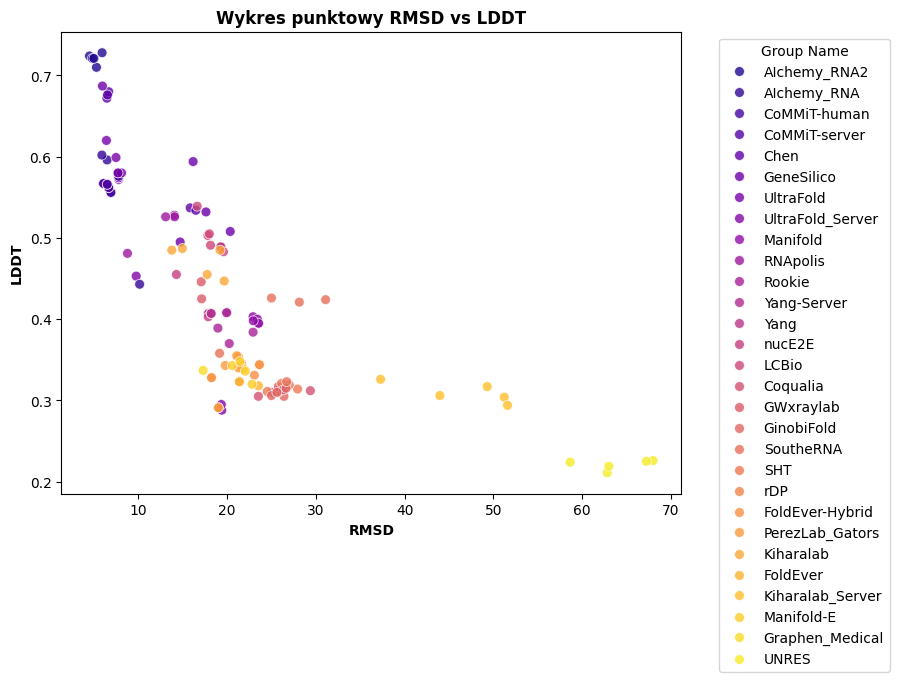

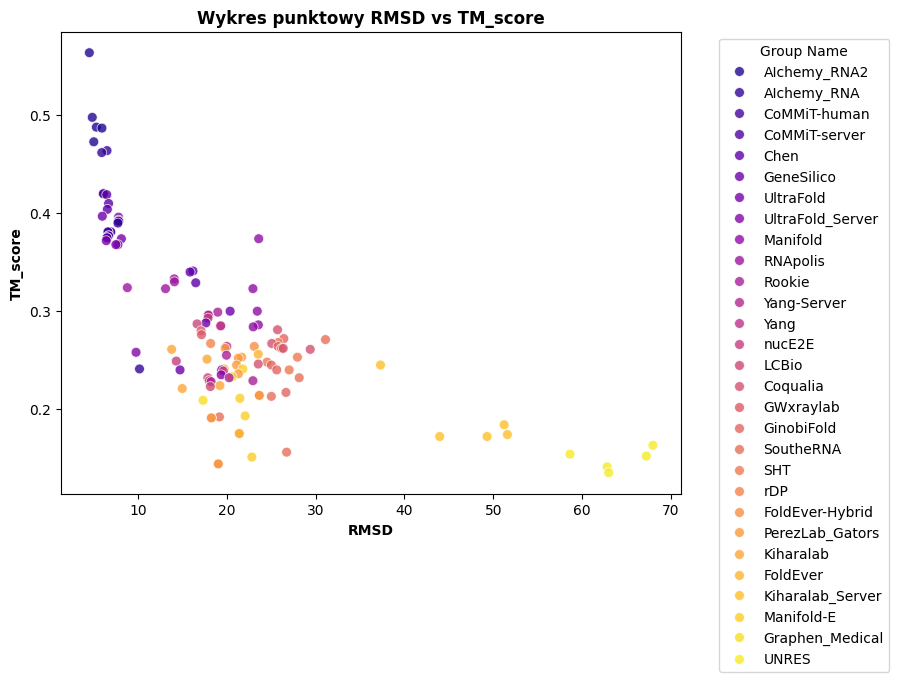

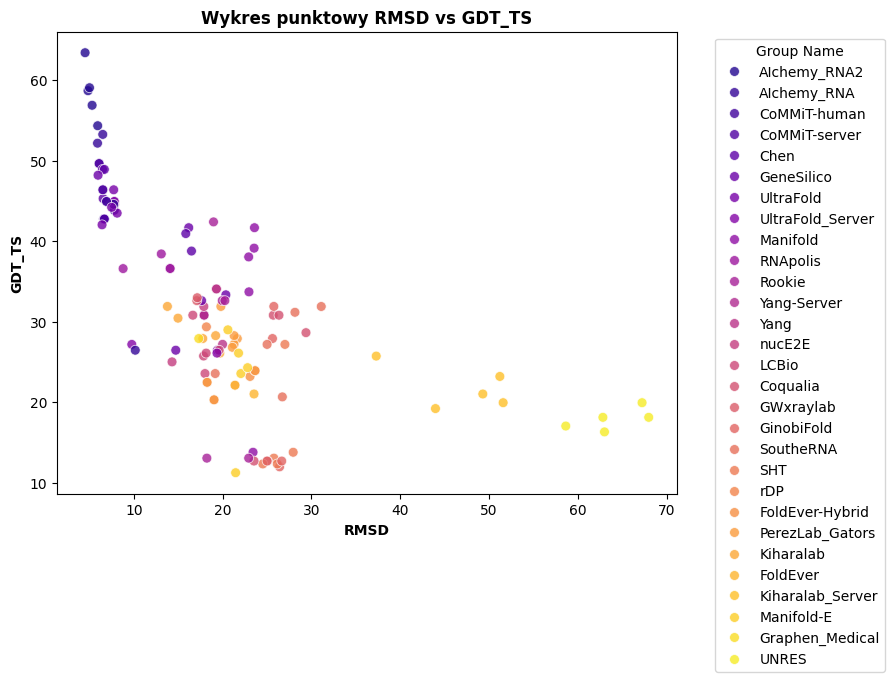

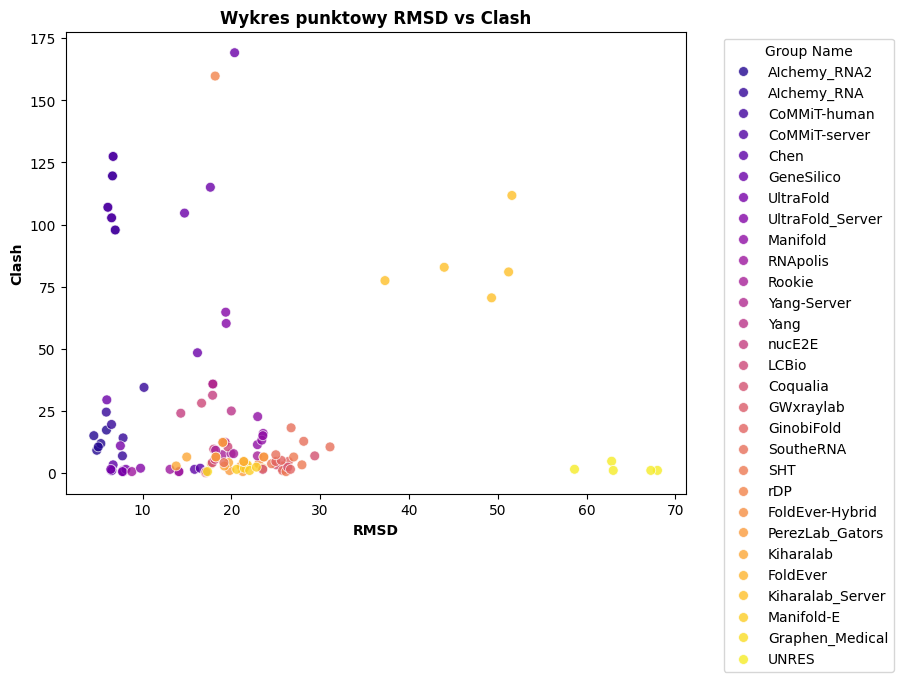

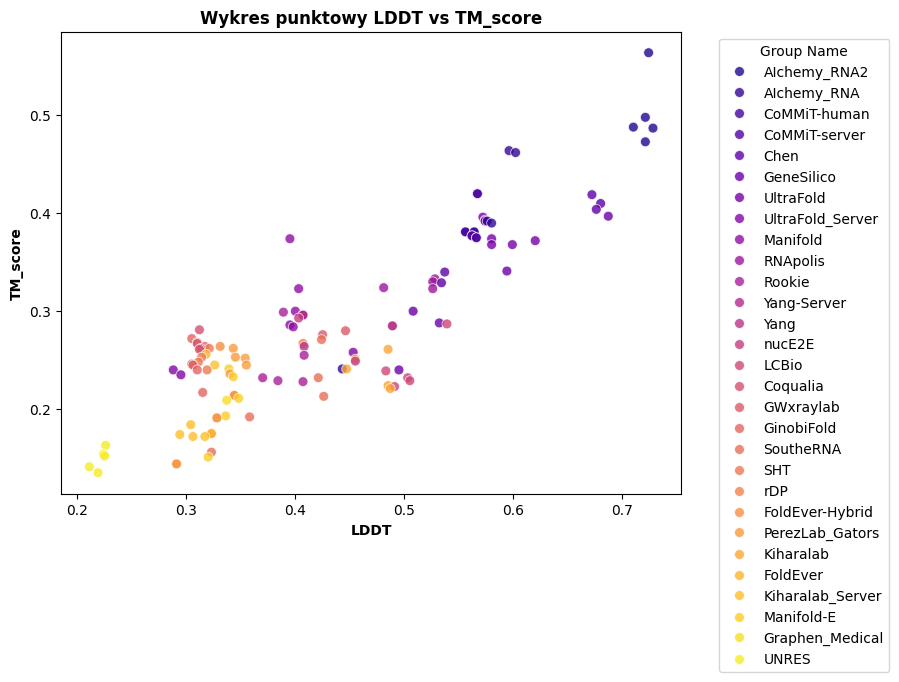

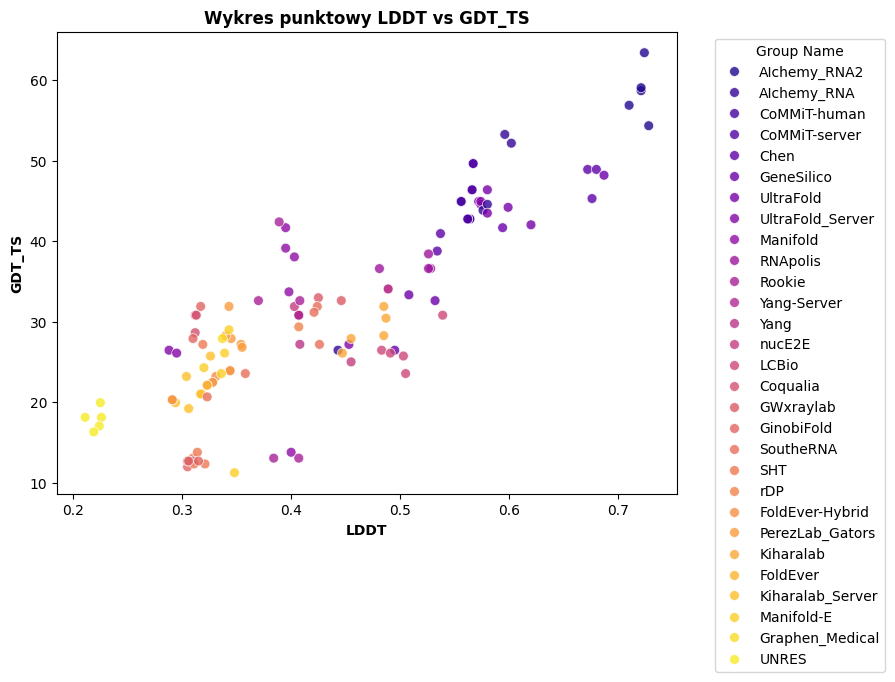

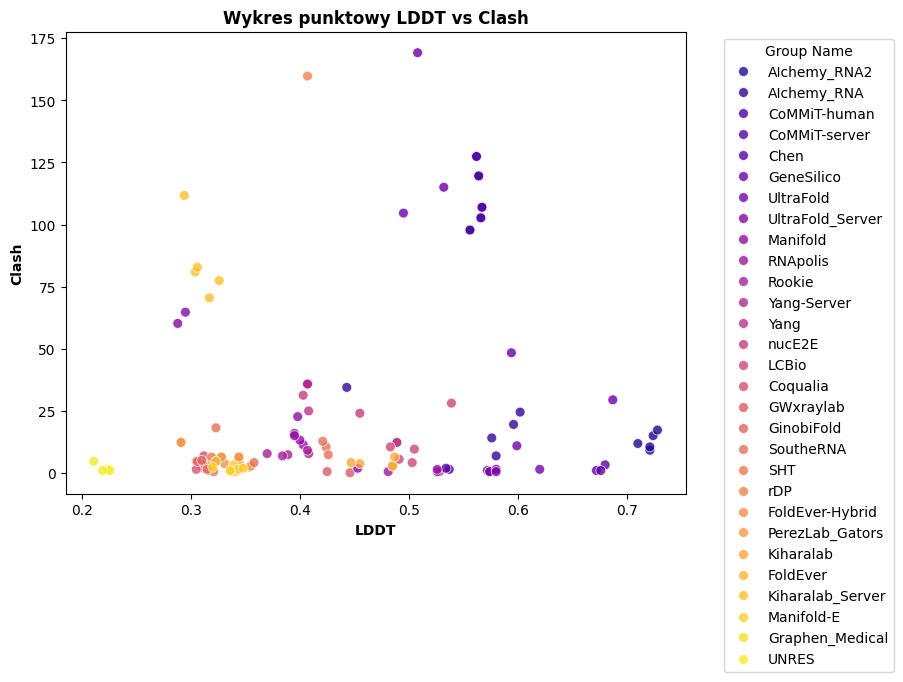

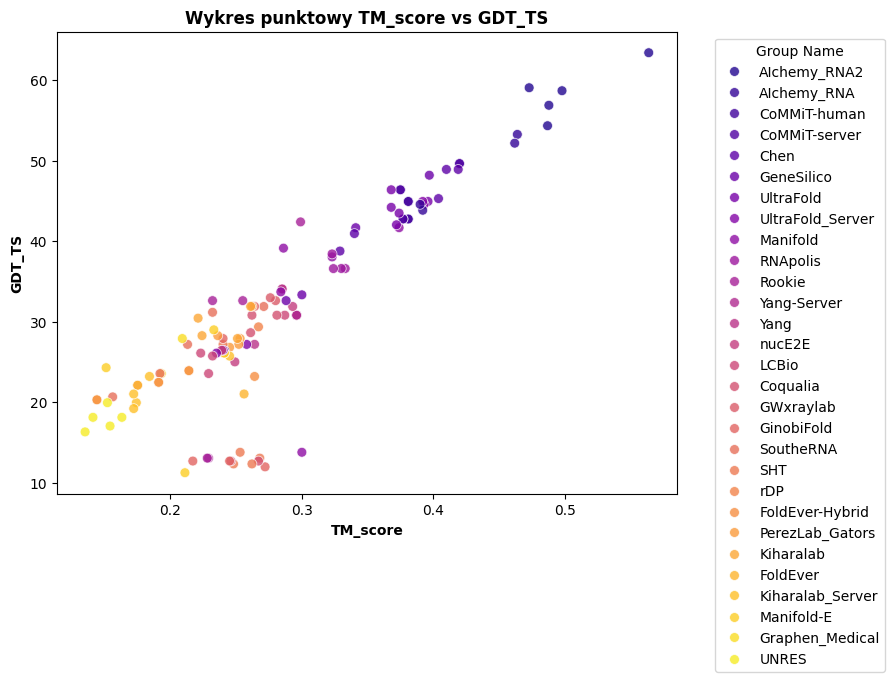

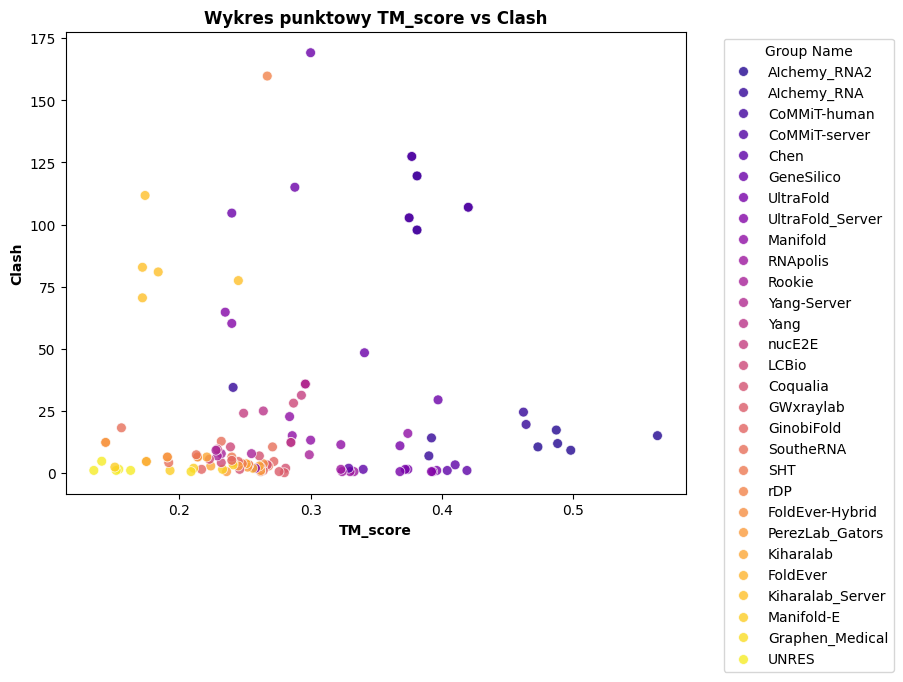

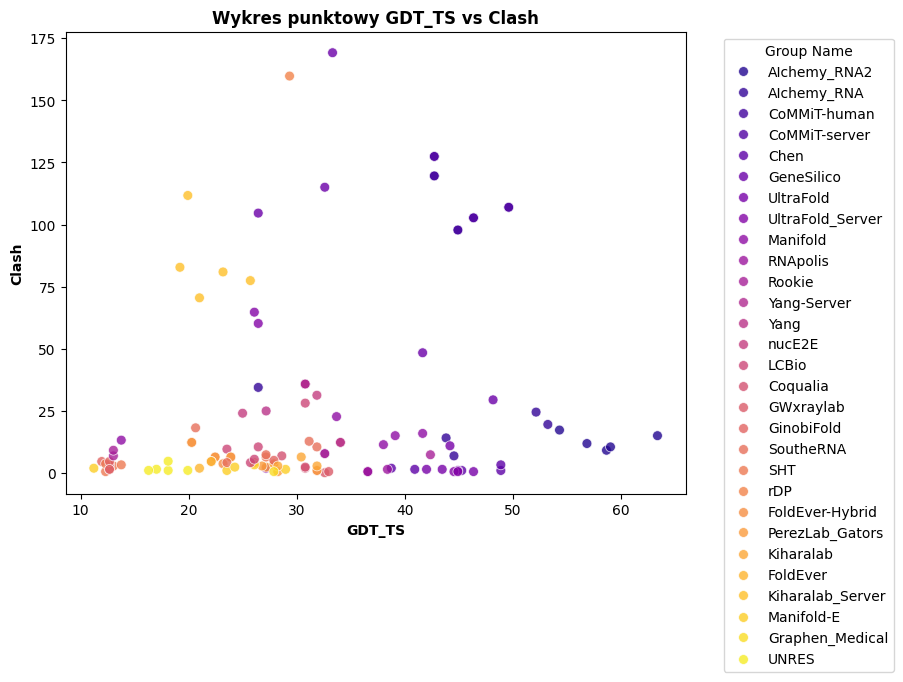

Wyniki testu Spearmana dla par metryk:
                    Korelacja Spearmana       p-value
RMSD vs LDDT                  -0.878655  3.044074e-43
RMSD vs TM_score              -0.734306  1.876485e-23
RMSD vs GDT_TS                -0.772916  2.950357e-27
RMSD vs Clash                 -0.169054  5.357099e-02
LDDT vs TM_score               0.782771  2.382131e-28
LDDT vs GDT_TS                 0.832610  6.643807e-35
LDDT vs Clash                  0.168079  5.498531e-02
TM_score vs GDT_TS             0.853032  3.005778e-38
TM_score vs Clash              0.179434  4.029544e-02
GDT_TS vs Clash                0.175889  4.447959e-02


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from itertools import combinations

file = 'R1107.csv'
data = pd.read_csv(file)

metrics = ['RMSD', 'LDDT', 'TM_score', 'GDT_TS', 'Clash']

metrics_data = data[metrics].dropna()

correlation_results = {}

for metric1, metric2 in combinations(metrics, 2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=metrics_data[metric1], y=metrics_data[metric2], hue=data['GroupName'], palette="plasma", s=50, alpha=0.8)
    plt.title(f'Wykres punktowy {metric1} vs {metric2}', fontweight='bold')
    plt.xlabel(metric1, fontweight='bold')
    plt.ylabel(metric2, fontweight='bold')
    plt.legend(title='Group Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    spearman_corr, p_value = spearmanr(metrics_data[metric1], metrics_data[metric2])
    correlation_results[f'{metric1} vs {metric2}'] = {
        'Korelacja Spearmana': spearman_corr,
        'p-value': p_value
    }

correlation_results_df = pd.DataFrame(correlation_results).T

print("Wyniki testu Spearmana dla par metryk:")
print(correlation_results_df)


Ocena 4.0

Przeprowadź kompleksową analizę statystyczną dla powiązanych par metryk:

1. Oblicz współczynnik korelacji Pearsona dla każdej pary zależnych metryk.

2. Przeprowadź test istotności statystycznej dla uzyskanych współczynników korelacji.

3. Dla par metryk wykazujących istotną korelację:

• Wykonaj analizę regresji liniowej.

• Stwórz wizualizację zależności między metrykami.

Wyniki analizy korelacji Pearsona dla par metryk:
                   Pearson Correlation      P-value Istotność
RMSD vs LDDT             -7.657757e-01 1.690422e-26       Tak
RMSD vs TM_score         -7.146087e-01 9.293582e-22       Tak
RMSD vs GDT_TS           -6.535412e-01 2.639285e-17       Tak
RMSD vs Clash            -1.100511e-01 2.108159e-01       Nie
LDDT vs TM_score          8.708249e-01 1.324339e-41       Tak
LDDT vs GDT_TS            8.599054e-01 1.724010e-39       Tak
LDDT vs Clash             1.860115e-01 3.340382e-02       Tak
TM_score vs GDT_TS        8.823966e-01 4.572550e-44       Tak
TM_score vs Clash         1.811468e-01 3.839513e-02       Tak
GDT_TS vs Clash           2.069646e-01 1.769903e-02       Tak


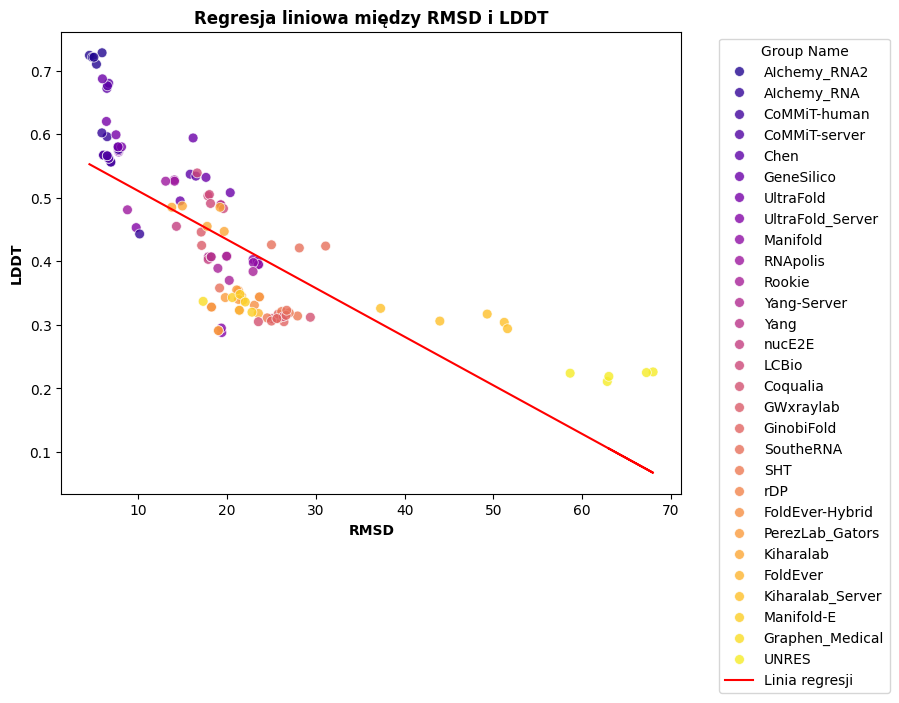

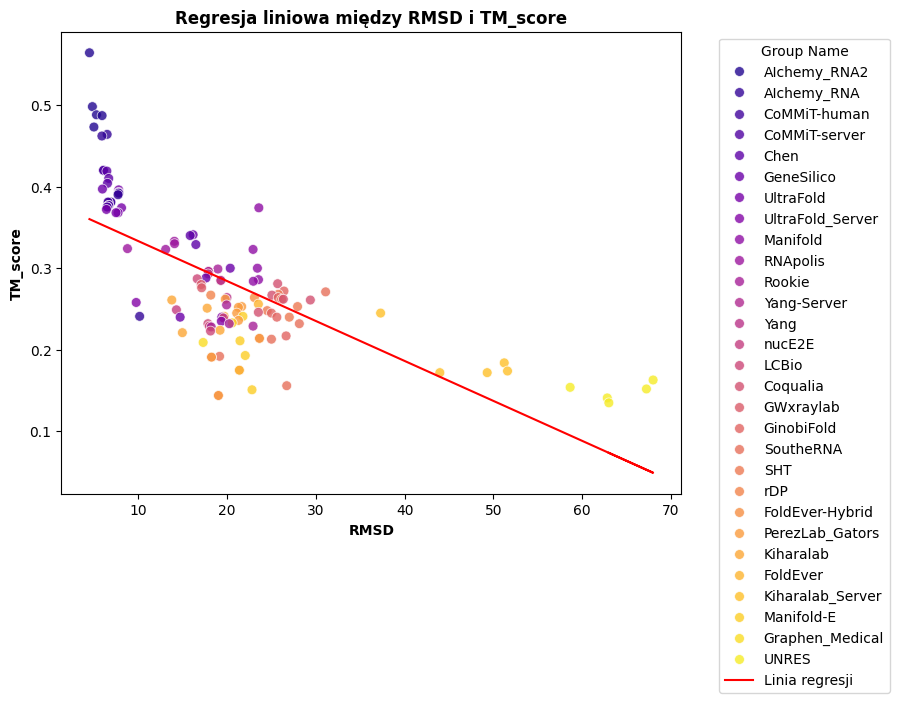

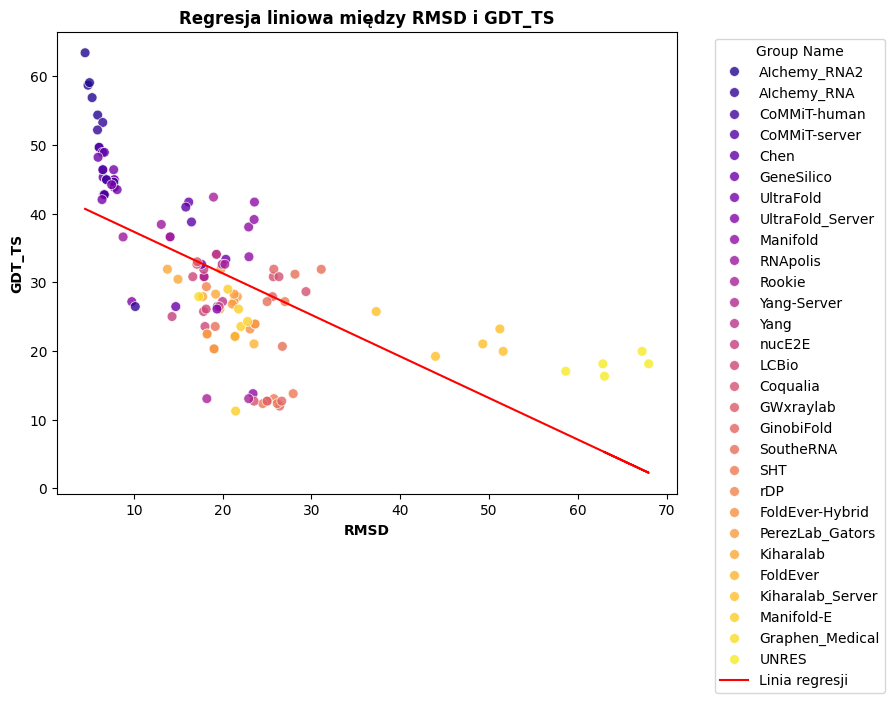

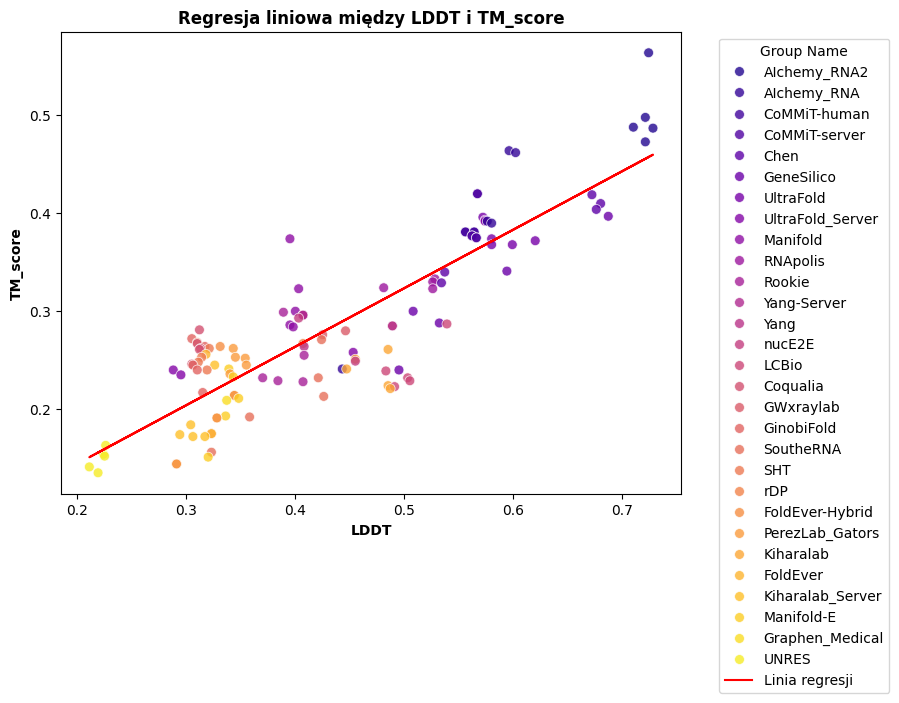

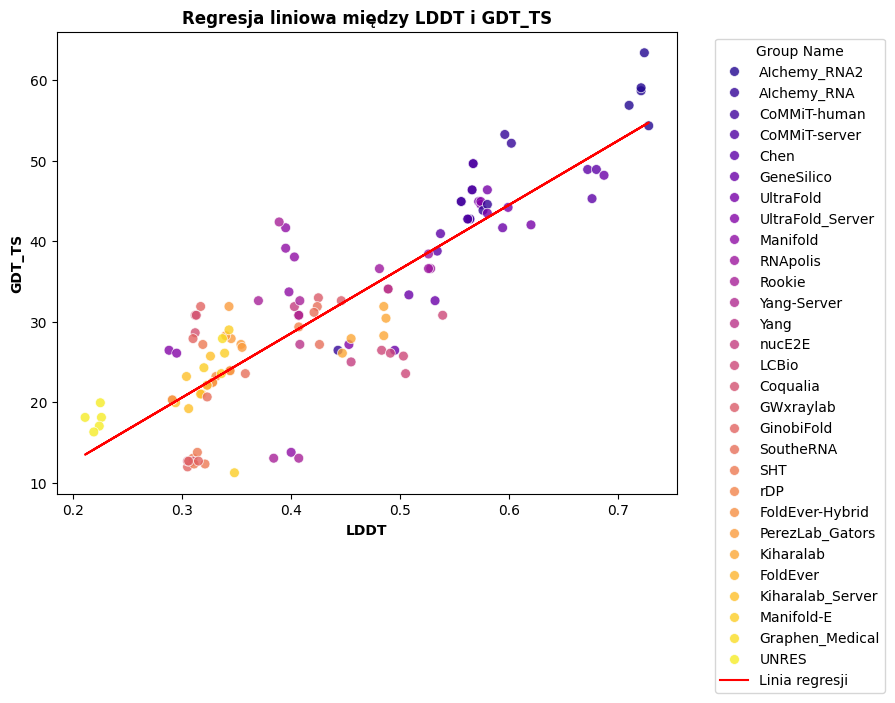

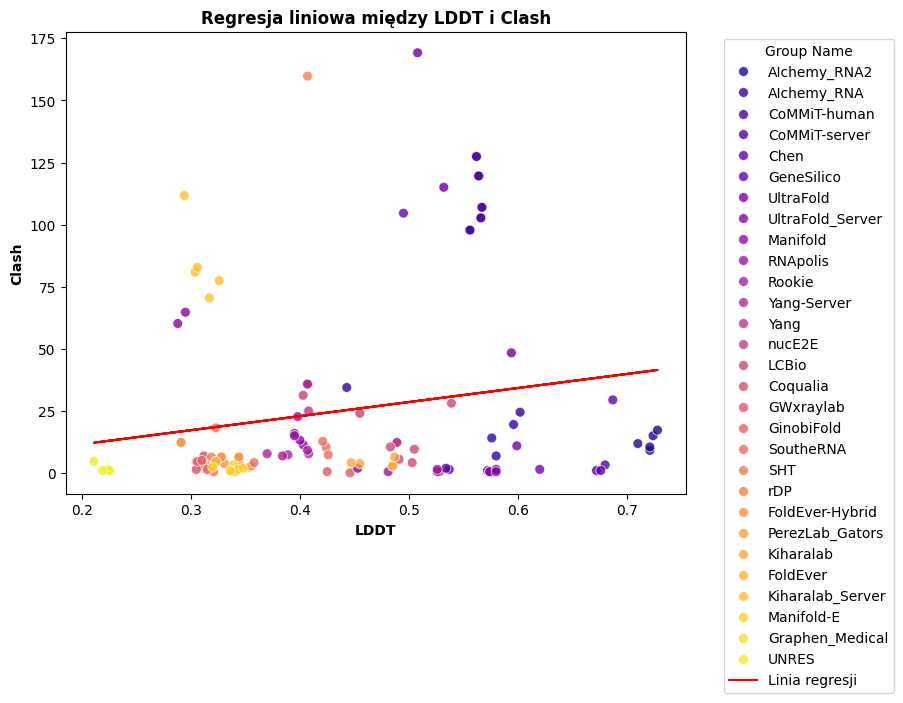

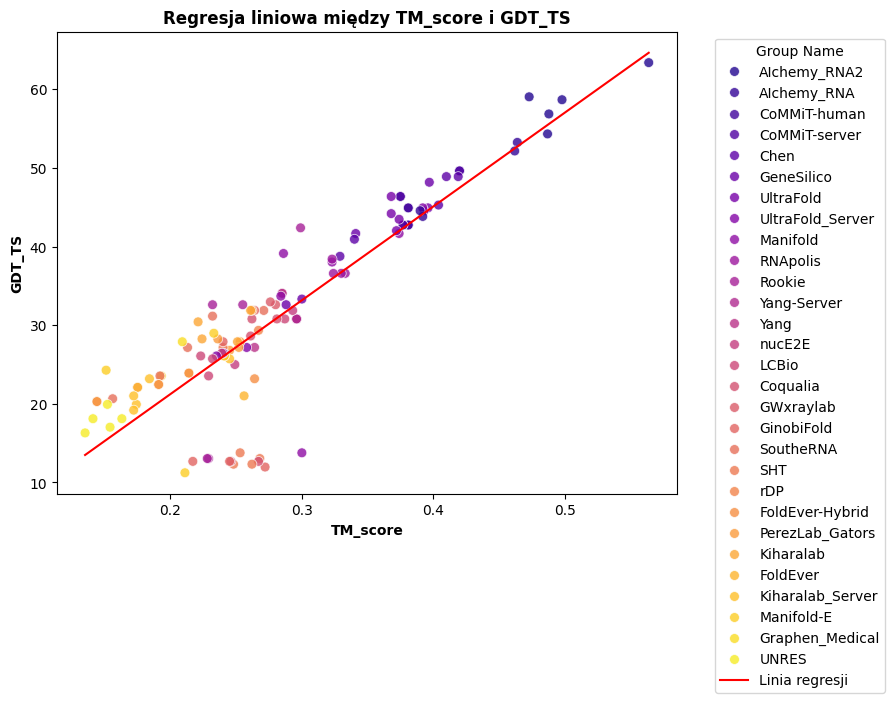

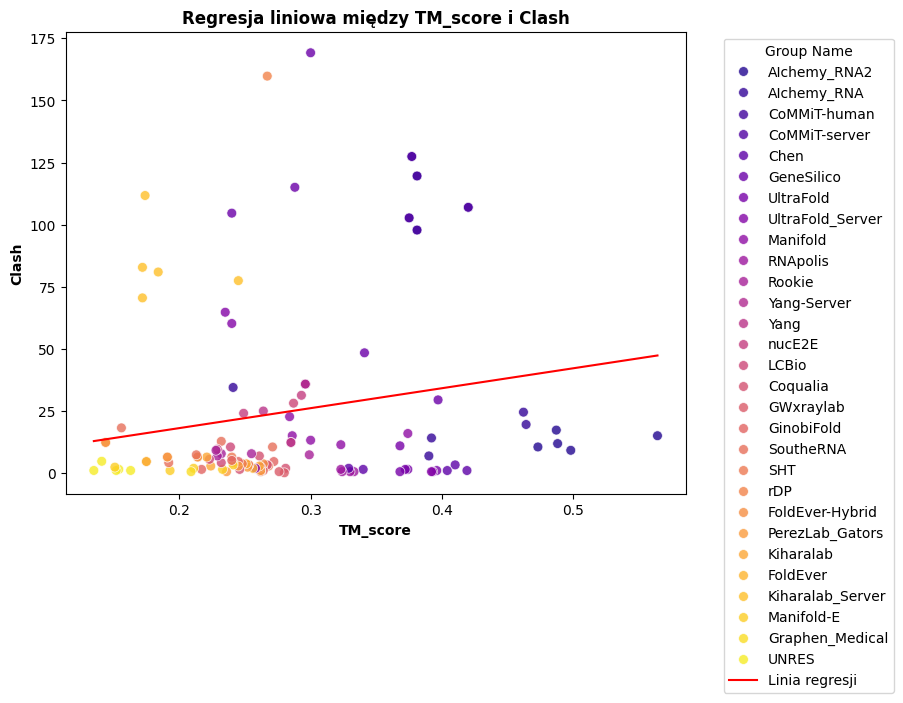

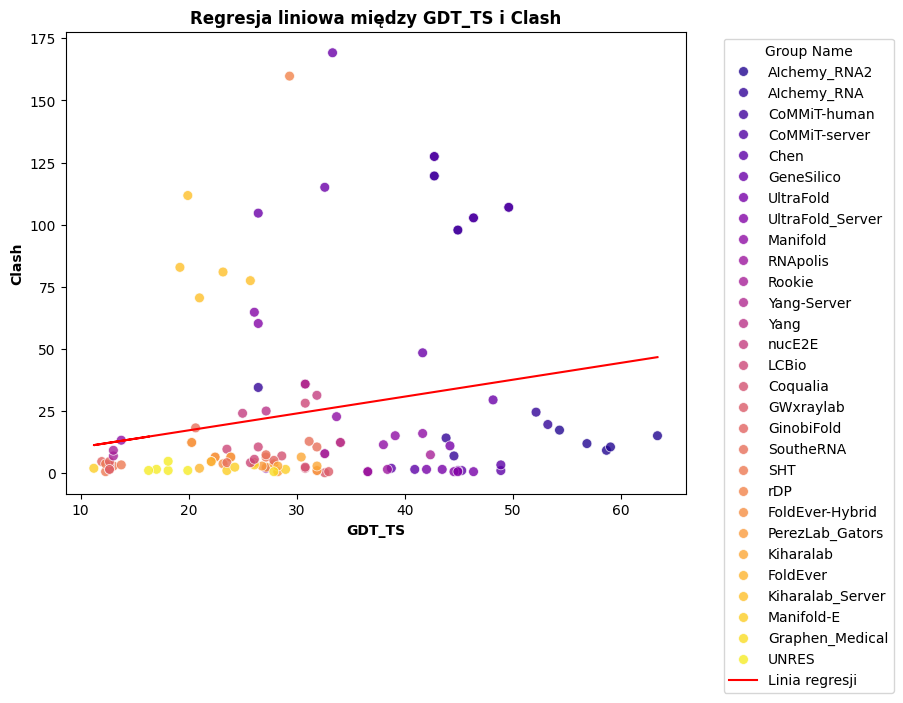

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from itertools import combinations

file = 'R1107.csv'
data = pd.read_csv(file)

metrics = ['RMSD', 'LDDT', 'TM_score', 'GDT_TS', 'Clash']

metrics_data = data[metrics].apply(pd.to_numeric, errors='coerce').dropna()
pearson_results = {}

for metric1, metric2 in combinations(metrics, 2):
    pearson_corr, p_value = pearsonr(metrics_data[metric1], metrics_data[metric2])
    istotnosc = 'Tak' if p_value < 0.05 else 'Nie'
    pearson_results[f'{metric1} vs {metric2}'] = {
        'Pearson Correlation': pearson_corr,
        'P-value': p_value,
        'Istotność': istotnosc
    }

pearson_results_df = pd.DataFrame(pearson_results).T

print("Wyniki analizy korelacji Pearsona dla par metryk:")
print(pearson_results_df.to_string(float_format="{:e}".format)) 

for pair, result in pearson_results.items():
    if result['Istotność'] == 'Tak':
        metric1, metric2 = pair.split(' vs ')

        X = metrics_data[metric1]
        y = metrics_data[metric2]
        X = sm.add_constant(X)  
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X)
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=metrics_data[metric1], y=metrics_data[metric2], hue=data['GroupName'], palette="plasma", s=50, alpha=0.8)
        plt.plot(metrics_data[metric1], predictions, color='red', label='Linia regresji')
        plt.title(f'Regresja liniowa między {metric1} i {metric2}', fontweight='bold')
        plt.xlabel(metric1, fontweight='bold')
        plt.ylabel(metric2, fontweight='bold')
        plt.legend(title='Group Name', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


Ocnea 4.5

Sprawdź normalność rozkładu dla podanych metryk:

1. Przeprowadź analizę normalności dla każdej metryki:

• Wygeneruj wykres Q-Q dla wizualnej oceny rozkładu

• Wykonaj test Shapiro-Wilka dla ilościowej weryfikacji normalności

2. Dla metryk LDDT, TM_score i GDT_TS:

• Zastosuj transformację logitową: y = log x
1−x

• Powtórz analizę normalności na przekształconych danych

• Uwaga! Dla GDT_TS trzeba najpierw przeskalować wartości dzieląc każdą przez 100

3. Porównaj wyniki przed i po transformacji logitowej:

• Oceń wpływ transformacji na normalność rozkładu

**Przed transformacją dla wszystkich metryk p value były znacznie mniejsze niż 0.05, zwłaszcza Clash oraz LDDT. Po transformacji p value znacznie poprawiła się, zwłaszcza dla TM_score (0.0659), GTD_TS również osiągnęło dużo lepszy wynik (0.0408), LDDT nadal odbiega od normalności, chociaż również jest sporo lepsze (0.00038). Podsumowując transformacja miało bardzo pozytywny wpływ na normalność rozkładu.**

• Zinterpretuj zmiany w wykresach Q-Q i wynikach testu Shapiro-Wilka

**Punkty na wykresach przedtransformacją wykazują odchylenia od linii prostej potwierdzając brak rozkładu normalnego. Po transformacji zwłaszcza TM_score i GDT_TS, są lepiej dopasowane do linii prostej, LDDT wciąż wykazuje odchylenia, co potwierdza również p value. Jednak podsumowując transformacja logitowa poprawiła dopasowanie do normalności dla TM_score i GDT_TS, dla LDDT poprawa jest częściowa, a RMSD i Clash pozostają odległe od rozkładu normalnego.**

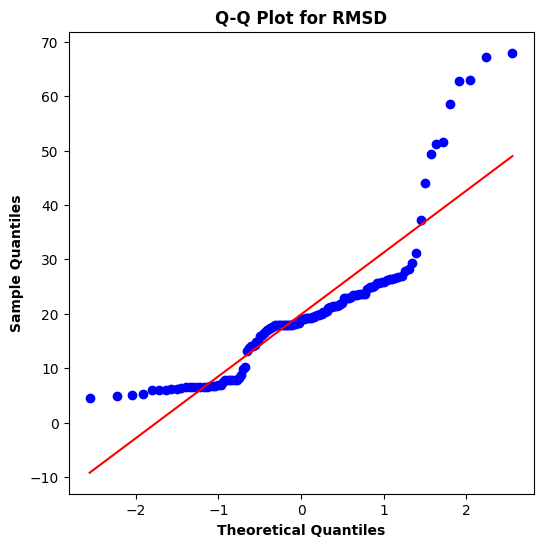

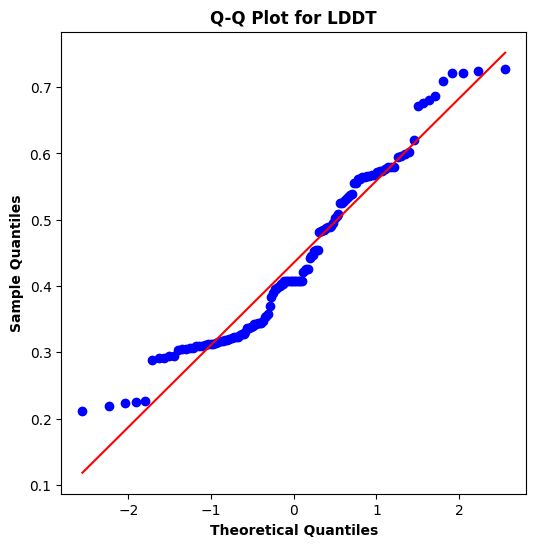

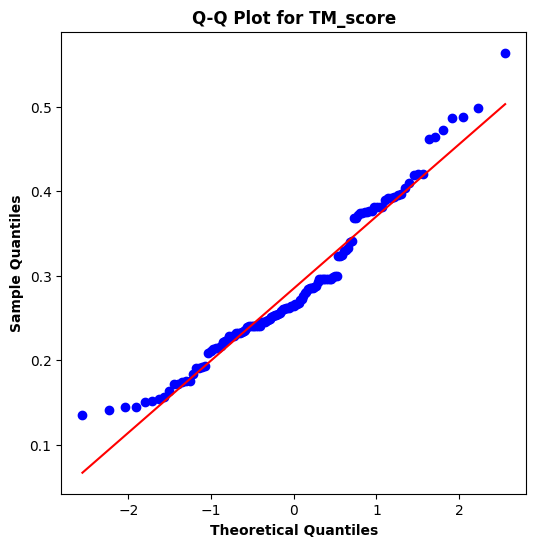

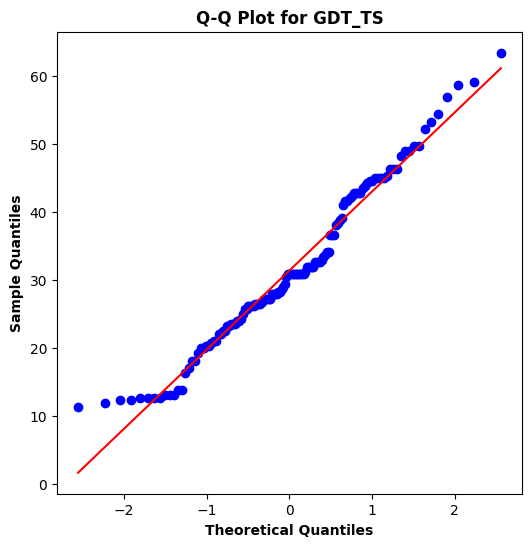

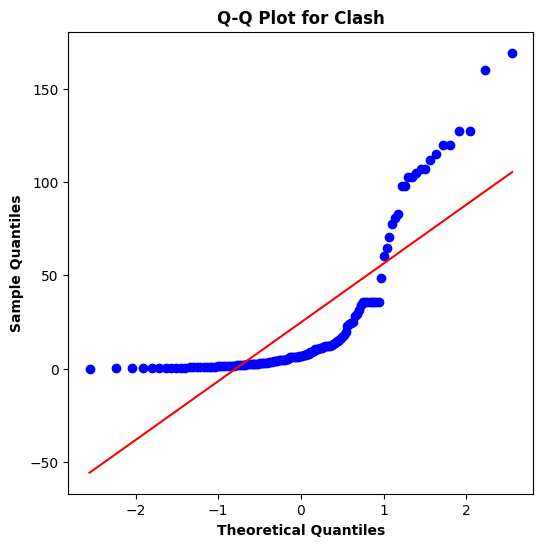

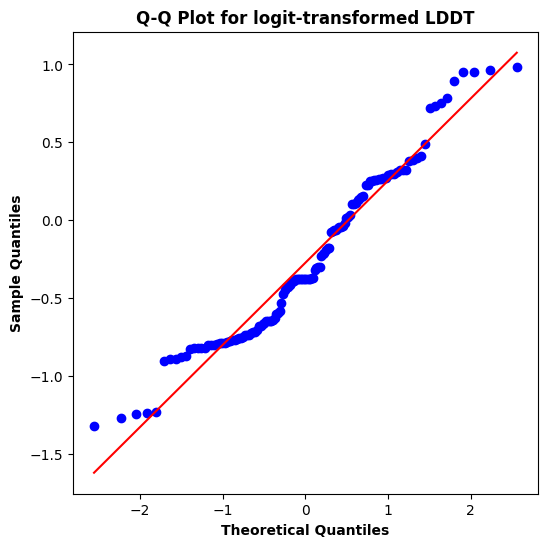

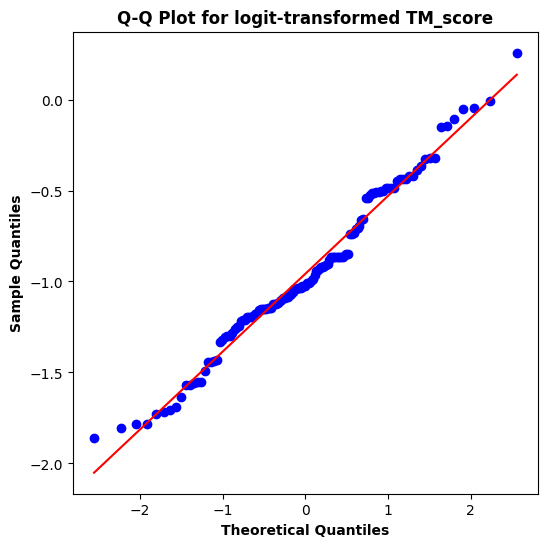

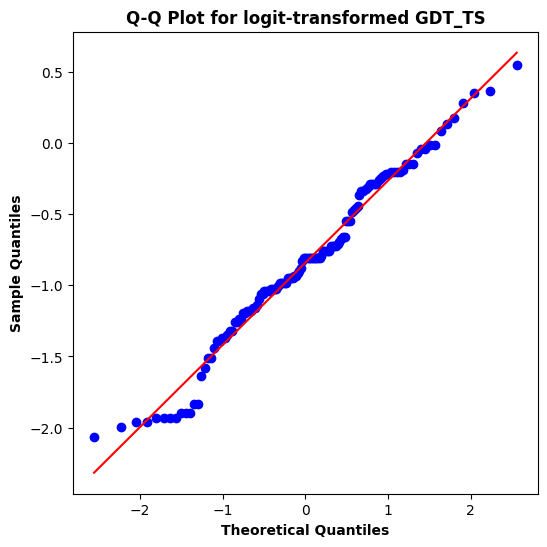

Wyniki testu Shapiro-Wilk:
         Shapiro-Wilk Stat      P-value Normalność rozkładu
RMSD          8.015949e-01 5.020518e-12                 Nie
LDDT          9.467294e-01 6.000356e-05                 Nie
TM_score      9.566682e-01 3.607156e-04                 Nie
GDT_TS        9.700200e-01 5.352843e-03                 Nie
Clash         6.628167e-01 6.240495e-16                 Nie

Wyniki testu Shapiro-Wilka dla danych po transformacji logitowej:
         Shapiro-Wilk Stat      P-value Normalność rozkładu
LDDT          9.569013e-01 3.769864e-04                 Nie
TM_score      9.811563e-01 6.591287e-02                 Tak
GDT_TS        9.790920e-01 4.084784e-02                 Nie


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
import seaborn as sns

file = 'R1107.csv'
data = pd.read_csv(file)

metrics = ['RMSD', 'LDDT', 'TM_score', 'GDT_TS', 'Clash']
metrics_data = data[metrics + ['GroupName']].dropna()  

def logit_transform(x):
    return np.log(x / (1 - x))

normality = {}
logit_normality = {}

for metric in metrics:
    plt.figure(figsize=(6, 6))
    probplot(metrics_data[metric], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {metric}', fontweight='bold')
    plt.xlabel('Theoretical Quantiles', fontweight='bold')
    plt.ylabel('Sample Quantiles', fontweight='bold')
    plt.show()

    shapiro_stat, p_value = shapiro(metrics_data[metric])
    normality[metric] = {
        'Shapiro-Wilk Stat': shapiro_stat,
        'P-value': p_value,
        'Normalność rozkładu': 'Tak' if p_value >= 0.05 else 'Nie'
    }

logit_metrics = ['LDDT', 'TM_score', 'GDT_TS']

for metric in logit_metrics:
    if metric == 'GDT_TS':
        transformed_data = metrics_data[metric] / 100
    else:
        transformed_data = metrics_data[metric]

    transformed_data = logit_transform(transformed_data.clip(0.0001, 0.9999))

    plt.figure(figsize=(6, 6))
    probplot(transformed_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for logit-transformed {metric}', fontweight='bold')
    plt.xlabel('Theoretical Quantiles', fontweight='bold')
    plt.ylabel('Sample Quantiles', fontweight='bold')
    plt.show()
    
    shapiro_stat, p_value = shapiro(transformed_data)
    logit_normality[metric] = {
        'Shapiro-Wilk Stat': shapiro_stat,
        'P-value': p_value,
        'Normalność rozkładu': 'Tak' if p_value >= 0.05 else 'Nie'
    }

normality_df = pd.DataFrame(normality).T
logit_normality_df = pd.DataFrame(logit_normality).T

print("Wyniki testu Shapiro-Wilk:")
print(normality_df.to_string(float_format="{:e}".format))
print("\nWyniki testu Shapiro-Wilka dla danych po transformacji logitowej:")
print(logit_normality_df.to_string(float_format="{:e}".format))


Ocena 5.0 

Przeanalizuj zbiorczo ranking modeli:
1. Transformacja metryk na Z-score i robust Z-score:

• Dla każdej metryki (RMSD, Clash, LDDT, TM_score, GDT_TS):

– Oblicz Z-score Zi = xi−μ σ , gdzie μ to średnia arytmetyczna a σ to odchylenie standardowe

– Oblicz MAD 

2. Identyfikacja obserwacji odstających:

• Dla każdej metryki:

– Oznacz jako outlier, jeśli |Zi| > 3

– Oznacz jako outlier, jeśli |RZi| > 3

• Porównaj listy outlierów dla obu metod

**Więcej outlierów  wystąpiło w Robust Z-score niż w Z-score. Robust Z-score korzysta z mediany oraz z MAD, przez co mniejsze odchylenie od mediany, odbiegające od rozkładu, ale w niedużym stopniu różne od średniej, są identyfikowane jako outliery. Robut Z-score jest zatem bardziej wrażliwy na odchylenia. Z-score wykazał wartości bardzo skrajnie odstające.**

3. Wyznaczenie sumarycznego Z-score i robust Z-score:

• Dla każdego modelu:

– Odwróć znak Z-score i robust Z-score dla RMSD i Clash

– Oblicz sumę Z-scores i sumę robust Z-scores

4. Porównanie rankingów:

• Utwórz ranking modeli na podstawie sumarycznego Z-score

• Utwórz ranking modeli na podstawie sumarycznego robust Z-score

• Porównaj oba rankingi (np. korelacja Spearmana, różnice w top 10)

**Modele zostały posortowane według Sum Z-score oraz Sum Robust Z-score, a najlepsze 10 wyników wskazuje te, które mają najwyższe sumaryczne Z-score, co oznacza ich wyższą ocenę jakości. Model R1107TS232_1 zajął pierwsze miejsce w obu rankingach. Współczynnik korelacji Spearmana oraz p value wskazuje na bardzo silną korelację między rankingami opartymi na Z-score i Robust Z-score. Oba rankingi są dość zgodne, mimo, że istnieją pewne różnice w pozycjach modeli w top 10. Różnice te mogą wynikać z tego, że Robust Z-score lepiej radzi sobie z wartościami odstającymi.**

5. Analiza na poziomie grup:

• Dla każdej grupy:

– Oblicz średni sumaryczny Z-score i robust Z-score jej modeli

• Utwórz rankingi grup na podstawie średnich sumarycznych Z-score i robust Z-score

• Porównaj rankingi grup

**Ogólna tendencja w obu rankingach jest podobna, istnieją pewne różnice wynikają z faktu, że Z-score jest bardziej podatny na wpływ skrajnych wartości. Oba rankingi dają cenne informacje na temat ogólnej jakości grup, ale Robust Z-score może być bardziej miarodajny w przypadku grup z większymi odchyleniami w poszczególnych wynikach modeli.**


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

file = 'R1107.csv'
data = pd.read_csv(file)
metrics = ['RMSD', 'Clash', 'LDDT', 'TM_score', 'GDT_TS']

z_scores = {}
robust_z_scores = {}
outliers_z = {}
outliers_robust_z = {}
common_outliers = {}

for metric in metrics:
    metric_data = data[metric].dropna() 

    mean = metric_data.mean()
    std_dev = metric_data.std()
    z_scores[metric] = (metric_data - mean) / std_dev

    median = metric_data.median()
    mad = np.median(np.abs(metric_data - median)) 
    robust_z_scores[metric] = (metric_data - median) / mad

    outliers_z[metric] = z_scores[metric][np.abs(z_scores[metric]) > 3].index.tolist()
    outliers_robust_z[metric] = robust_z_scores[metric][np.abs(robust_z_scores[metric]) > 3].index.tolist()

    common_outliers[metric] = list(set(outliers_z[metric]).intersection(outliers_robust_z[metric]))

z_scores_df = pd.DataFrame(z_scores)
robust_z_scores_df = pd.DataFrame(robust_z_scores)

print("Z-score dla każdej metryki:")
print(z_scores_df.to_string())

print("\nRobust Z-score dla każdej metryki:")
print(robust_z_scores_df.to_string())

outliers_summary = pd.DataFrame({
    'Metryka': metrics,
    'Outliers (Z-score)': [len(outliers_z[metric]) for metric in metrics],
    'Outliers (Robust Z-score)': [len(outliers_robust_z[metric]) for metric in metrics],
    'Część wspólna': [len(common_outliers[metric]) for metric in metrics],
    'Indeksy outlierów (Z-score)': [list(outliers_z[metric]) for metric in metrics],
    'Indeksy outlierów (Robust Z-score)': [list(outliers_robust_z[metric]) for metric in metrics],
    'Indeksy wspólne': [list(common_outliers[metric]) for metric in metrics]
})

print("Podsumowanie outlierów dla każdej metryki:")
print(outliers_summary[['Metryka', 'Outliers (Z-score)', 'Outliers (Robust Z-score)', 'Część wspólna']].to_string(index=False))

for metric in metrics:
    print(f"\nMetryka: {metric}")
    print(f"Outliers (Z-score): {outliers_summary['Indeksy outlierów (Z-score)'][metrics.index(metric)]}")
    print(f"Outliers (Robust Z-score): {outliers_summary['Indeksy outlierów (Robust Z-score)'][metrics.index(metric)]}")
    print(f"Część wspólna: {outliers_summary['Indeksy wspólne'][metrics.index(metric)]}")

z_scores_df['Model'] = data['Model']
robust_z_scores_df['Model'] = data['Model']
z_scores_df['RMSD'] *= -1
z_scores_df['Clash'] *= -1
robust_z_scores_df['RMSD'] *= -1
robust_z_scores_df['Clash'] *= -1


z_scores_df['Sumaryczny Z-score'] = z_scores_df[metrics].sum(axis=1)
robust_z_scores_df['Sumaryczny Robust Z-score'] = robust_z_scores_df[metrics].sum(axis=1)

ranking_z_named = z_scores_df[['Model', 'Sumaryczny Z-score']].sort_values(by='Sumaryczny Z-score', ascending=False)
ranking_robust_z_named = robust_z_scores_df[['Model', 'Sumaryczny Robust Z-score']].sort_values(by='Sumaryczny Robust Z-score', ascending=False)


spearman_corr, _ = spearmanr(z_scores_df['Sumaryczny Z-score'], robust_z_scores_df['Sumaryczny Robust Z-score'])

top_10_z_named = ranking_z_named.head(10)
top_10_robust_z_named = ranking_robust_z_named.head(10)
top_10_overlap_named = set(top_10_z_named['Model']).intersection(set(top_10_robust_z_named['Model']))

print("\nTop 10 modeli w rankingu Z-score:")
print(top_10_z_named)
print("\nTop 10 modeli w rankingu Robust Z-score:")
print(top_10_robust_z_named)
print(f"\nKorelacja Spearmana między rankingami: {spearman_corr:.4f}")
print("\nModele wspólne w Top 10 dla obu rankingów:")
print(top_10_overlap_named)

summary_scores = pd.DataFrame({
    'Sumaryczny Z-score': z_scores_df['Sumaryczny Z-score'],
    'Sumaryczny Robust Z-score': robust_z_scores_df['Sumaryczny Robust Z-score'],
    'GroupName': data['GroupName']
})
group_summary = summary_scores.groupby('GroupName').mean()
group_ranking_z = group_summary['Sumaryczny Z-score'].sort_values(ascending=False)
group_ranking_robust_z = group_summary['Sumaryczny Robust Z-score'].sort_values(ascending=False)

print("\nRanking grup na podstawie średniego Sumarycznego Z-score:")
print(group_ranking_z.head(10))
print("\nRanking grup na podstawie średniego Sumarycznego Robust Z-score:")
print(group_ranking_robust_z.head(10))



Z-score dla każdej metryki:
         RMSD     Clash      LDDT  TM_score    GDT_TS
0   -1.222515 -0.258665  2.301516  3.240629  2.751831
1   -1.196252 -0.412512  2.277607  2.474301  2.346409
2   -1.159642 -0.341606  2.189939  2.358191  2.190940
3   -1.109502 -0.199534  2.333395  2.346580  1.972768
4   -1.182722 -0.377190  2.277607  2.184025  2.378190
5   -1.064137 -0.140403  1.281378  2.079526  1.880001
6   -1.111093 -0.010366  1.329197  2.056304  1.786376
7   -1.096768  2.148976  1.050253  1.568641  1.569063
8   -1.096768  2.148976  1.050253  1.568641  1.569063
9   -1.066524 -0.625751  1.887085  1.557030  1.506360
10  -1.049811 -0.566358  1.950844  1.452531  1.506360
11  -1.060953 -0.625751  1.918964  1.382864  1.195422
12  -1.106318  0.118886  2.006632  1.301587  1.444516
13  -0.960673 -0.625751  1.090102  1.289976  1.164500
14  -0.959877 -0.637525  1.106042  1.255143  1.133578
15  -0.960673 -0.637525  1.106042  1.243532  1.164500
16  -0.960673 -0.282475  1.121982  1.243532  1.070875
